# 股票分析

分析你的持仓股票

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 持仓股票
stocks = {
    '紫金矿业': '601899.SS',
    '剑桥科技': '603083.SS',
    '兴业银锡': '600737.SS',
    '铜陵有色': '000630.SZ',
    '英维克': '002837.SZ'
}

# 下载数据
data = {}
for name, ticker in stocks.items():
    data[name] = yf.download(ticker, period='6mo')
    print(f"{name}: {len(data[name])} days")

[*********************100%***********************]  1 of 1 completed


紫金矿业: 119 days


[*********************100%***********************]  1 of 1 completed


剑桥科技: 119 days


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


兴业银锡: 119 days
铜陵有色: 119 days


[*********************100%***********************]  1 of 1 completed

英维克: 119 days


/Users/ustar/quant-strategy/venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ustar/quant-strategy/venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ustar/quant-strategy/venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32043 (\N{CJK UNIFIED IDEOGRAPH-7D2B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ustar/quant-strategy/venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ustar/quant-strategy/venv/lib/python3.14/site-packages/IPython/core/pylabtools.py

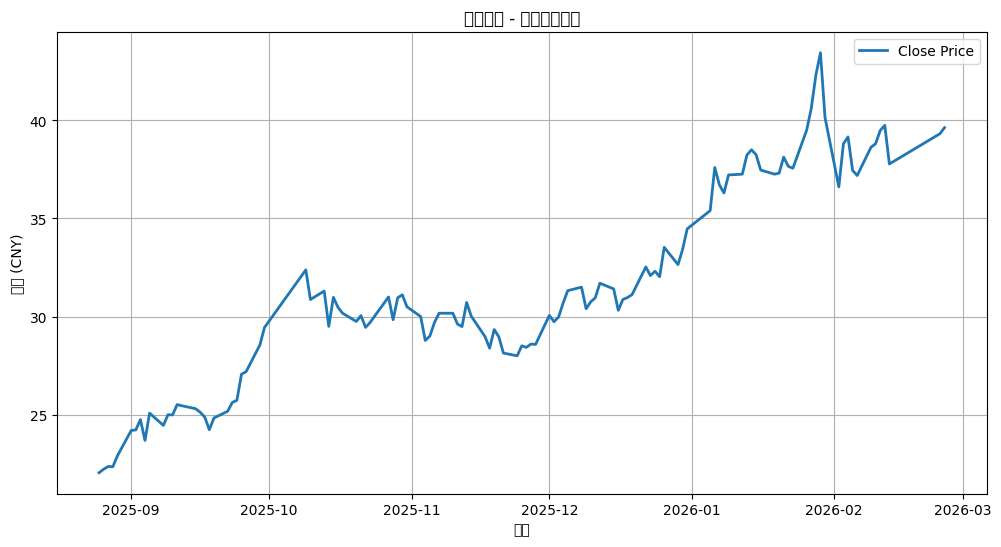

In [2]:
# 画K线图 - 以紫金矿业为例
df = data['紫金矿业']

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['Close'], label='Close Price', linewidth=2)
ax.set_title('紫金矿业 - 最近半年股价')
ax.set_xlabel('日期')
ax.set_ylabel('价格 (CNY)')
ax.legend()
ax.grid(True)
plt.show()

TypeError: only 0-dimensional arrays can be converted to Python scalars

/Users/ustar/quant-strategy/venv/lib/python3.14/site-packages/IPython/core/events.py:96: UserWarning: Glyph 32043 (\N{CJK UNIFIED IDEOGRAPH-7D2B}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/ustar/quant-strategy/venv/lib/python3.14/site-packages/IPython/core/events.py:96: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/ustar/quant-strategy/venv/lib/python3.14/site-packages/IPython/core/events.py:96: UserWarning: Glyph 30719 (\N{CJK UNIFIED IDEOGRAPH-77FF}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/ustar/quant-strategy/venv/lib/python3.14/site-packages/IPython/core/events.py:96: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


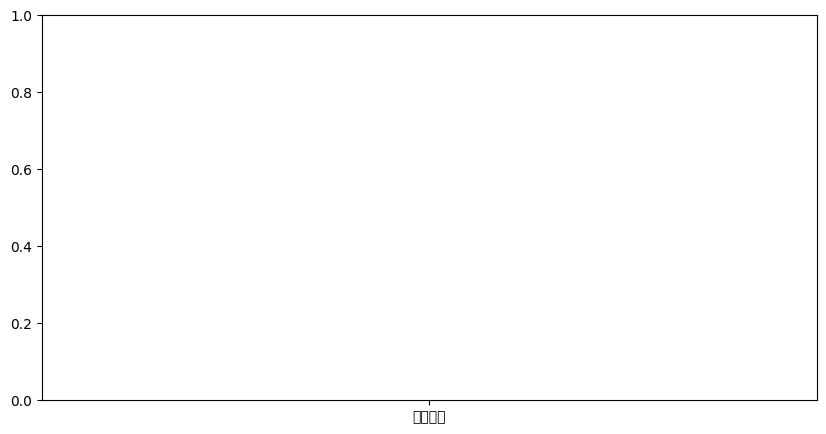

In [3]:
# 所有股票收益率对比
returns = {}
for name, df in data.items():
    if len(df) > 0:
        ret = (df['Close'].iloc[-1] / df['Close'].iloc[0] - 1) * 100
        returns[name] = ret

plt.figure(figsize=(10, 5))
plt.bar(returns.keys(), returns.values())
plt.title('持仓股票近半年收益率 (%)')
plt.ylabel('收益率 (%)')
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(rotation=45)
plt.show()